# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_request = requests.get(btc_url).json()
btc_price = btc_request['data']["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_request = requests.get(eth_url).json()
eth_price = eth_request['data']["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43710.00
The current value of your 5.3 ETH is $13809.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg= 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

In [8]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                       \
                             open      high       low   close   volume   
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.36  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.21  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.09  5580443   
2021-01-11 00:00:00-05:00  117.02  117.0500  116.8900  116.89  5047096   
2021-01-12 00:00:00-05:00  116.82  116.9900  116.6800  116.98  5103382   

                              SPY                                      
                             open    high       low   close    volume  
2021-01-06 00:00:00-05:00  369.71  376.98  369.1200  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.90  375.9100  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466  
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805  
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896

In [10]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.36
Current SPY closing price: $373.53


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18676.50
The current value of your 200 AGG shares is $23472.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = [my_btc_value + my_eth_value,
             my_spy_value + my_agg_value]

df_savings = pd.DataFrame(df_savings, columns=['Amount'], index=['Crypto','Shares'])
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,57519.362
Shares,42148.500


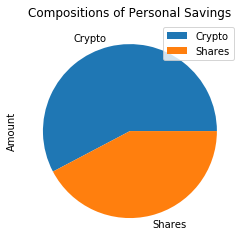

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title="Compositions of Personal Savings");

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund!")
elif total_savings == emergency_fund: 
    print("Congratulations for reaching your financial goal!")
else:
    print(f"You are {emergency_fund - total_savings} away from reaching your financial goal.")

Congratulations! You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [18]:
# Printing the simulation input data
MC_30_yrs.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000429,1.003796,0.999354,0.998512,0.993556,0.984587,0.996123,1.010530,0.996213,1.011633,...,1.003672,0.993239,0.992973,0.994404,0.997581,1.010500,1.006550,0.981500,1.006725,0.987947
2,1.000400,1.007135,0.998691,0.999637,0.984256,0.988560,0.996258,1.014278,1.013238,0.992505,...,1.002686,0.999645,0.988570,0.982390,0.987906,1.001719,1.005381,0.982004,0.989565,1.004516
3,1.001234,1.028389,1.003391,1.029488,0.991858,0.984405,0.996056,1.014023,1.006986,0.987659,...,1.011217,0.996255,0.988198,0.982748,0.986602,1.013120,0.999341,0.989060,0.989336,1.001148
4,1.003294,1.040014,1.012918,1.031276,1.006032,0.984006,0.992459,1.001703,1.004832,0.999051,...,1.027106,0.998542,0.977722,0.979830,0.970844,1.008986,0.996636,0.992514,0.982832,1.004551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,29.900024,19.505637,39.639999,24.452431,46.892671,5.920235,15.442065,11.275253,13.198445,5.480735,...,12.229230,12.599328,9.550358,4.967543,17.757298,14.534466,18.859433,4.903148,13.602452,7.631456
7557,29.982239,19.551439,39.142197,24.193972,47.013423,5.956724,15.433648,11.306689,13.164404,5.519928,...,12.211556,12.589510,9.711227,4.984907,17.645741,14.586447,18.628585,4.942889,13.453440,7.628384
7558,30.030350,19.661376,39.249082,24.340529,46.658998,5.919488,15.369862,11.366967,13.171470,5.512261,...,12.338395,12.417446,9.504093,4.989414,17.697528,14.558690,19.166122,4.903211,13.365148,7.730636
7559,29.859300,19.419475,39.027156,24.355388,47.117194,5.839683,15.310186,11.361792,13.230617,5.507153,...,12.184931,12.519542,9.648060,5.016703,17.521748,14.917930,19.026968,4.848329,13.212177,7.801399


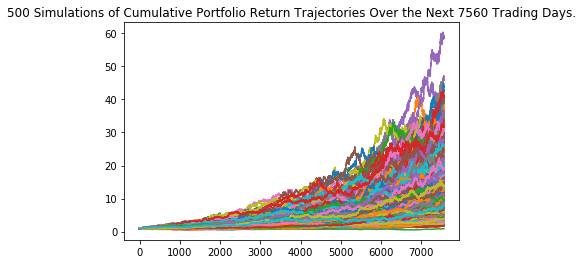

In [20]:
# Plot simulation outcomes
line_plot = MC_30_yrs.plot_simulation()

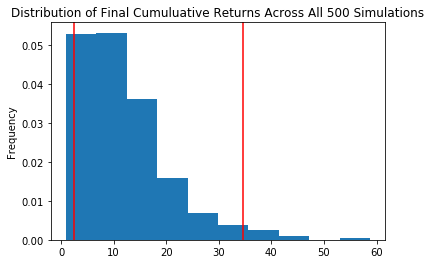

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_yrs.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_30_yrs.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             12.150194
std               8.251434
min               0.897813
25%               6.119097
50%              10.235531
75%              15.558650
max              58.784347
95% CI Lower      2.545532
95% CI Upper     34.661860
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50910.64 and $693237.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76365.96 and $1039855.8


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995798,1.008239,1.006471,1.003892,0.997270,1.004087,0.996073,0.995817,1.004231,0.998321,...,0.999956,1.001918,1.000264,1.001109,1.004199,1.002033,0.999251,1.000198,0.999347,1.006889
2,0.994240,1.007004,1.006145,0.999843,0.991629,1.001083,0.998142,0.993679,1.001669,0.998725,...,1.002832,1.002131,1.002909,1.006507,1.008053,0.998023,0.995250,0.999859,0.997623,1.007519
3,0.990510,1.005549,1.006296,0.997791,0.992841,0.998032,0.998958,0.991527,1.003820,1.002466,...,1.003824,1.002210,0.999039,1.001707,1.005426,0.998036,0.995617,0.997652,0.996470,1.006539
4,0.993540,1.005333,0.993284,0.996765,0.995574,1.000354,1.000553,0.985767,1.007901,1.002333,...,1.003991,0.995733,1.001585,1.004397,1.005783,0.995807,0.997657,0.997827,0.997035,1.009603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.948171,1.161666,1.225310,1.859300,1.282791,1.501603,1.059308,1.254027,1.356826,1.247655,...,1.104425,1.226918,1.071283,1.430794,1.410456,1.195711,1.199908,1.333014,1.290440,1.315955
1257,0.951550,1.164746,1.225958,1.866365,1.282587,1.511308,1.058449,1.254392,1.359983,1.252149,...,1.111581,1.225554,1.072214,1.422881,1.409065,1.198433,1.198682,1.336514,1.297870,1.310215
1258,0.946380,1.171407,1.226835,1.859385,1.285845,1.515054,1.061982,1.252621,1.350623,1.259432,...,1.108076,1.229308,1.070658,1.420088,1.406615,1.200402,1.198735,1.331190,1.304220,1.307702
1259,0.941118,1.171891,1.221814,1.872491,1.288398,1.516876,1.060170,1.253058,1.351655,1.259791,...,1.109638,1.225399,1.067434,1.425915,1.414158,1.200813,1.196605,1.327597,1.304686,1.315405


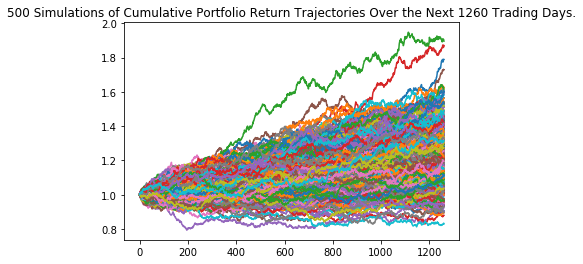

In [27]:
# Plot simulation outcomes
line_plot = MC_5yrs.plot_simulation()

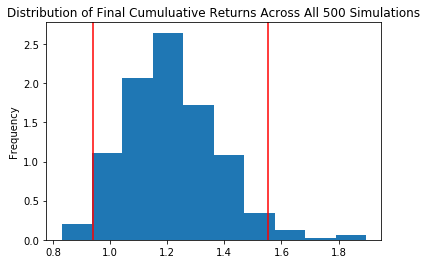

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5yrs.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
Fiveyrs_tbl = MC_5yrs.summarize_cumulative_return()

# Print summary statistics
print(Fiveyrs_tbl)

count           500.000000
mean              1.213156
std               0.159061
min               0.829865
25%               1.111973
50%               1.196387
75%               1.310435
max               1.896003
95% CI Lower      0.939315
95% CI Upper      1.554151
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment_2= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(Fiveyrs_tbl[8]*initial_investment_2,2)
ci_upper_five = round(Fiveyrs_tbl[9]*initial_investment_2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56358.92 and $93249.05


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.7,.3],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004940,0.997199,0.999923,1.002855,0.996133,0.991488,1.001956,0.995620,1.005971,0.995675,...,0.996433,0.996475,0.999872,0.992759,1.001504,1.000598,0.998574,0.996776,1.000032,1.002172
2,0.995702,0.999343,1.001618,0.998216,0.997657,0.992929,1.005429,0.984676,1.006147,0.996045,...,1.003347,0.997634,0.996233,0.990782,0.997095,1.000979,1.001448,0.996345,0.993035,1.001066
3,0.996112,1.010884,1.015376,0.996719,1.002313,0.994674,1.000887,0.991577,1.007655,0.992273,...,0.999587,1.001677,0.995480,0.989346,0.994571,1.002548,1.003446,0.994187,0.991352,1.000571
4,0.993230,1.007332,1.013173,0.994548,0.997564,0.992066,0.999531,0.991245,1.013348,0.989127,...,0.990797,0.999647,0.999009,0.990436,0.987418,0.999931,1.009554,0.994991,0.992728,1.004669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.109821,1.832477,1.458955,2.177364,1.730140,1.383571,1.523005,1.666227,1.061446,1.106598,...,1.579469,2.071256,2.304084,0.908067,1.295699,1.473343,1.376331,2.032064,1.568556,1.634936
2517,1.117493,1.826726,1.464854,2.163385,1.735329,1.381072,1.527599,1.653026,1.063276,1.112668,...,1.590461,2.072168,2.293259,0.910213,1.294113,1.466415,1.370906,2.030852,1.566737,1.638941
2518,1.116523,1.807372,1.473243,2.176263,1.748565,1.382625,1.539635,1.658006,1.062908,1.112861,...,1.582328,2.058326,2.285810,0.914315,1.300642,1.482699,1.364927,2.037418,1.578290,1.653813
2519,1.115686,1.809336,1.478302,2.172744,1.756919,1.387185,1.536470,1.654806,1.067018,1.106229,...,1.579368,2.045287,2.294763,0.904434,1.306210,1.471666,1.357566,2.031107,1.570876,1.669348


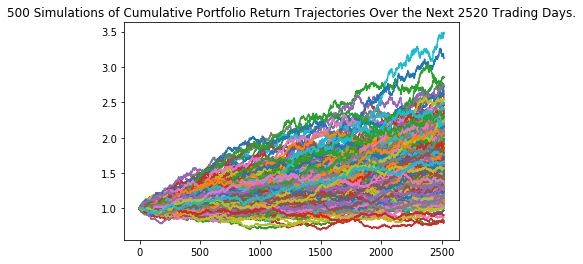

In [33]:
# Plot simulation outcomes
line_plot = MC_10yrs.plot_simulation()

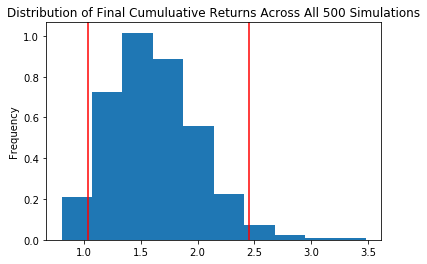

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10yrs.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
Tenyrs_tbl = MC_10yrs.summarize_cumulative_return()

# Print summary statistics
print(Tenyrs_tbl)

count           500.000000
mean              1.614165
std               0.380142
min               0.802620
25%               1.339508
50%               1.581186
75%               1.836238
max               3.480824
95% CI Lower      1.031638
95% CI Upper      2.449693
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment_3=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(Tenyrs_tbl[8]*initial_investment_2,2)
ci_upper_ten = round(Tenyrs_tbl[9]*initial_investment_2,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61898.27 and $146981.6
